In [1]:
import kagglehub
import os

path = kagglehub.dataset_download("alyelbadry/house-pricing-dataset")

print("Path to dataset files:", path)
print(os.listdir("/root/.cache/kagglehub/datasets/alyelbadry/house-pricing-dataset/versions/1"))

Using Colab cache for faster access to the 'house-pricing-dataset' dataset.
Path to dataset files: /kaggle/input/house-pricing-dataset
['house_prices.csv']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=(pd.read_csv("/content/archive.zip"))
display(df.head())

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... grade  sqft_above  sqft_basement  \
0      5650     1.0          N     0  ...     7        1180              0   
1      7242     2.0          N     0  ...     7        2170            400   
2     10000     1.0          N     0  ...     6         770              0   
3      5000     1.0          N     0  ...     7        1050            910   
4      8080     1.0          N     0  ...     8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Key Features:
General Information:

- id: Unique identifier for each property.
- date: Date of sale.

##Price Details:
- price: Sale price of the house.

##Property Features:

- bedrooms: Number of bedrooms.
- bathrooms: Number of bathrooms (including partials as fractions).
- sqft_living: Living space area in square feet.
- sqft_lot: Lot size in square feet.
floors: Number of floors.
- waterfront: Whether the property has a waterfront view.
- view: Quality of the view rating.
- condition: Overall condition of the house.
- grade: Grade of construction and design (scale of 1–13).

##Additional Metrics:

- sqft_above: Square footage of the property above ground.
- sqft_basement: Basement area in square feet.
- yr_built: Year the property was built.
- yr_renovated: Year of last renovation.

##Location Coordinates:

- zipcode: ZIP code of the property.
- lat and long: Latitude and longitude coordinates.

##Neighbor Comparisons:

- sqft_living15: Average living space of 15 nearest properties.
- sqft_lot15: Average lot size of 15 nearest
properties.

##Use Cases:

Predicting house prices using regression models.
Identifying the impact of various features (e.g., number of bedrooms, location) on property prices.
Analyzing market trends and spatial distribution of real estate prices.
This dataset is a valuable resource for anyone interested in real estate analytics, machine learning, or geographic data visualization.

In [4]:
X=df.drop("price", axis=1)
y=df["price"]
display(X.head(), y.head())
numeric_X=df.select_dtypes(include=["float", "int"]) #togliamo tutte le colonne non numeriche
numeric_X.head()

numeric_X.isna().sum()
print(numeric_X.isna().sum())

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  20141013T000000         3       1.00         1180      5650   
1  6414100192  20141209T000000         3       2.25         2570      7242   
2  5631500400  20150225T000000         2       1.00          770     10000   
3  2487200875  20141209T000000         4       3.00         1960      5000   
4  1954400510  20150218T000000         3       2.00         1680      8080   

   floors waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0          N     0    Average      7        1180              0   
1     2.0          N     0    Average      7        2170            400   
2     1.0          N     0    Average      6         770              0   
3     1.0          N     0  Very Good      7        1050            910   
4     1.0          N     0    Average      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


<Axes: >

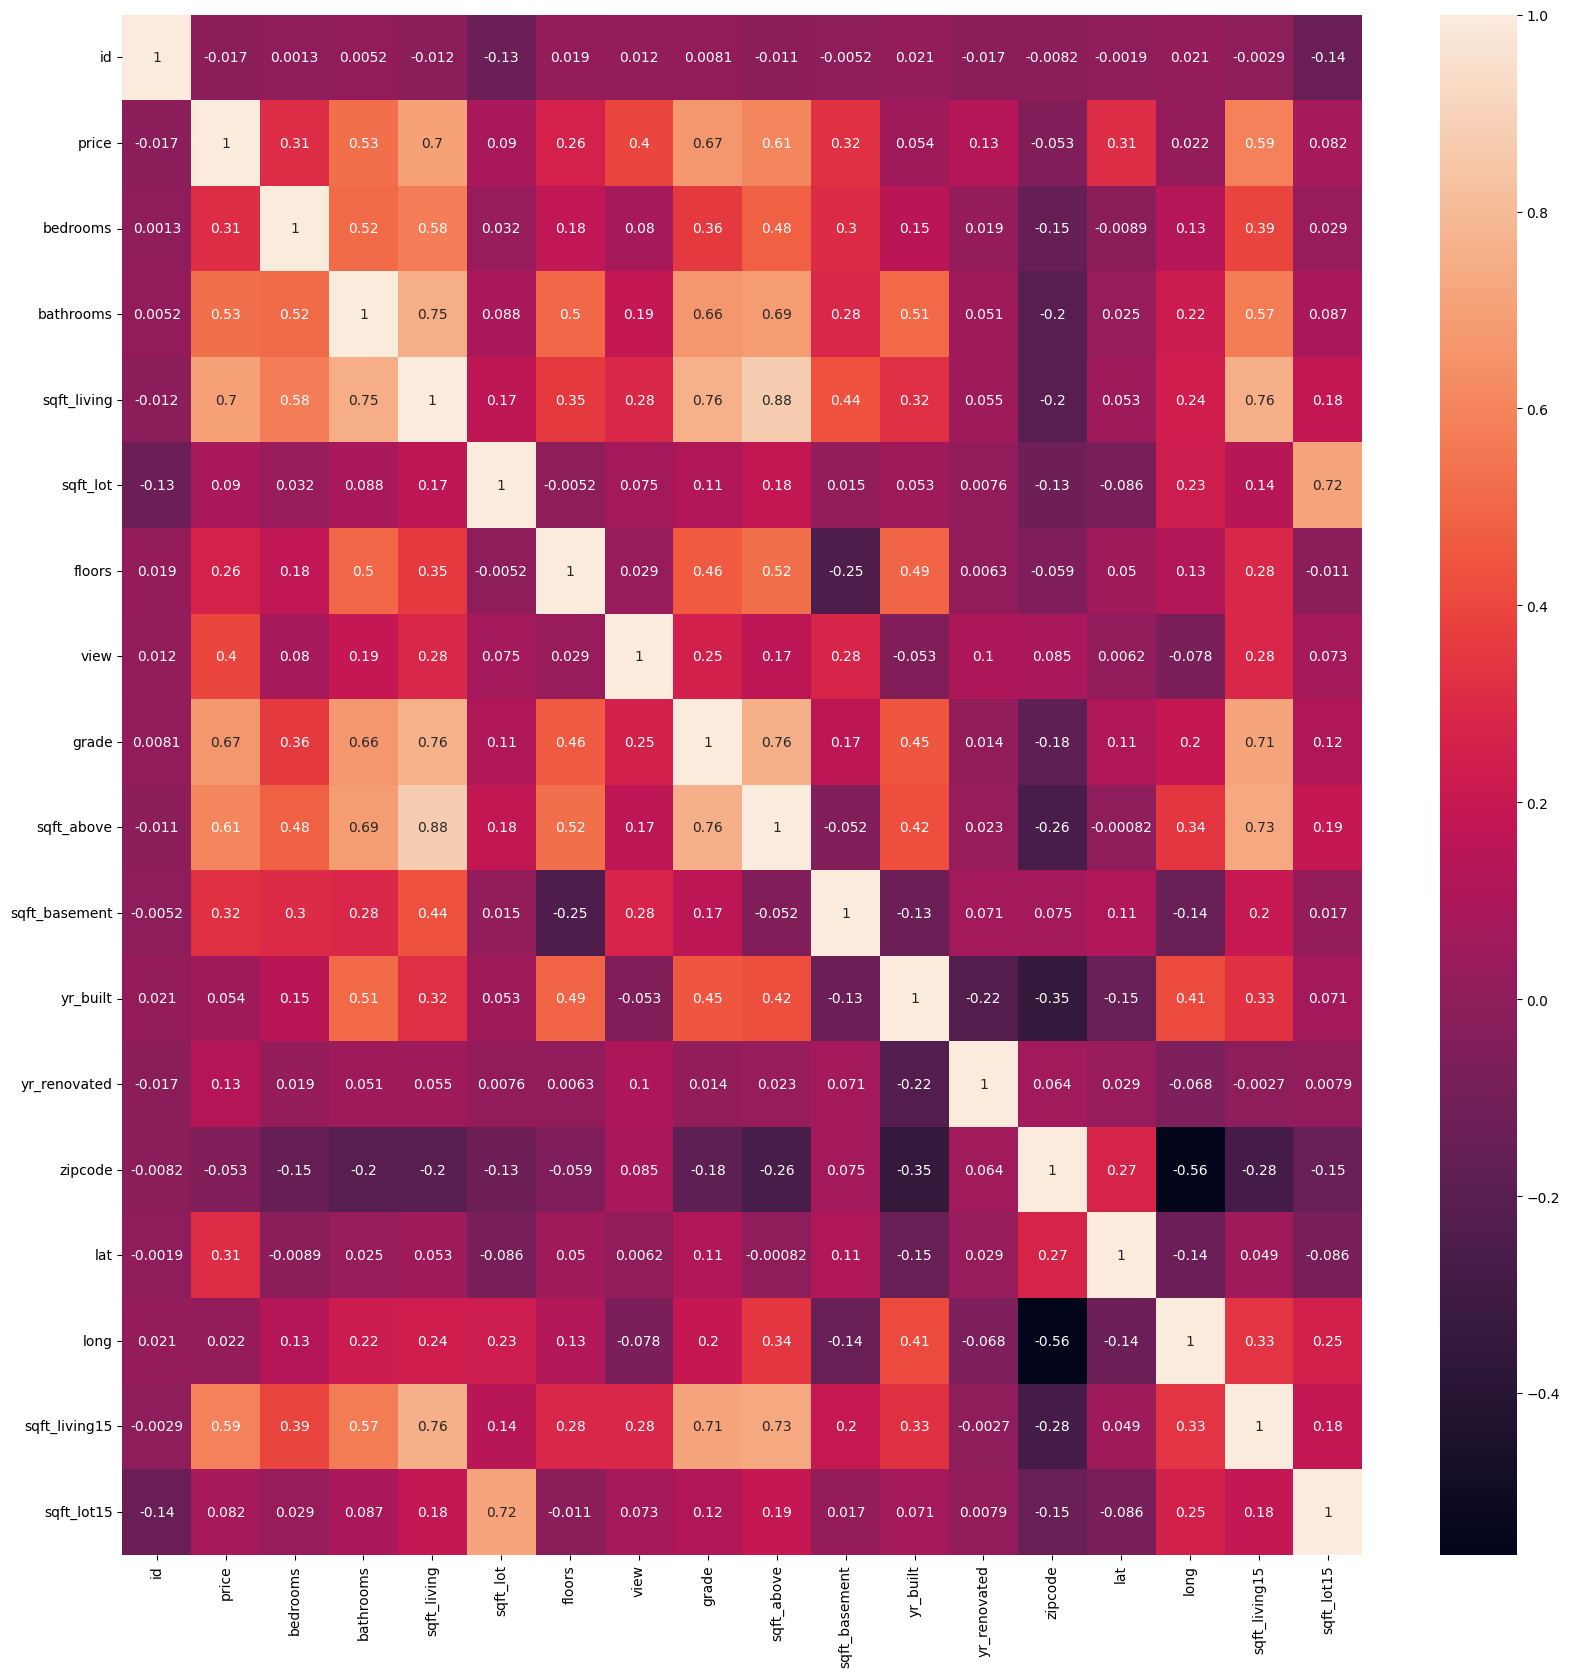

In [5]:
correlation_matrix=numeric_X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)

In [6]:
def scatter_high_cov(feature):
    for col in feature.columns:
        sns.scatterplot(x=feature.index, y=feature[col])
        plt.title(col)
        plt.show()

def high_cov_var(var1, var2):
    cov_matrix = np.cov(var1, var2)
    var1_std = np.std(var1, ddof=1)
    var2_std = np.std(var2, ddof=1)
    skewness = cov_matrix[0,1] / (var1_std*var2_std)
    return skewness

def iterate_cov(dataframe):
    couple_set = set()
    for key1 in dataframe:
        for key2 in dataframe:
            if key1 != key2 and key1 != 'id' and key2 != 'id':
                skewness = high_cov_var(dataframe[key1], dataframe[key2])
                if abs(skewness) >= 0.5:
                    if (key2, key1) not in couple_set:
                        couple_set.add((key1, key2))
    return list(couple_set)

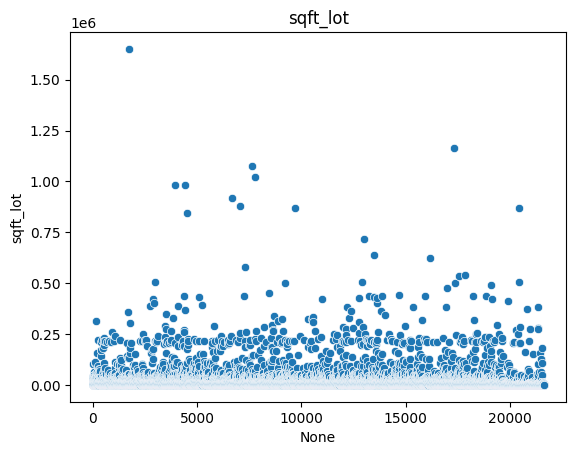

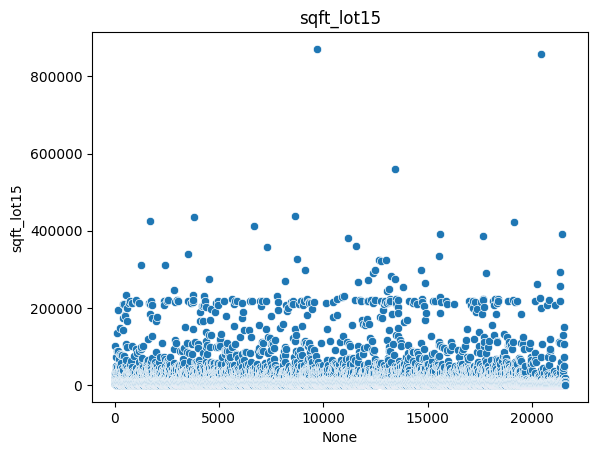

In [7]:
scatter_high_cov(numeric_X[['sqft_lot','sqft_lot15']])

['sqft_living', 'sqft_above', 'sqft_living15', 'price', 'grade', 'bathrooms', 'yr_built', 'bedrooms', 'sqft_lot', 'sqft_lot15', 'floors', 'zipcode', 'long']


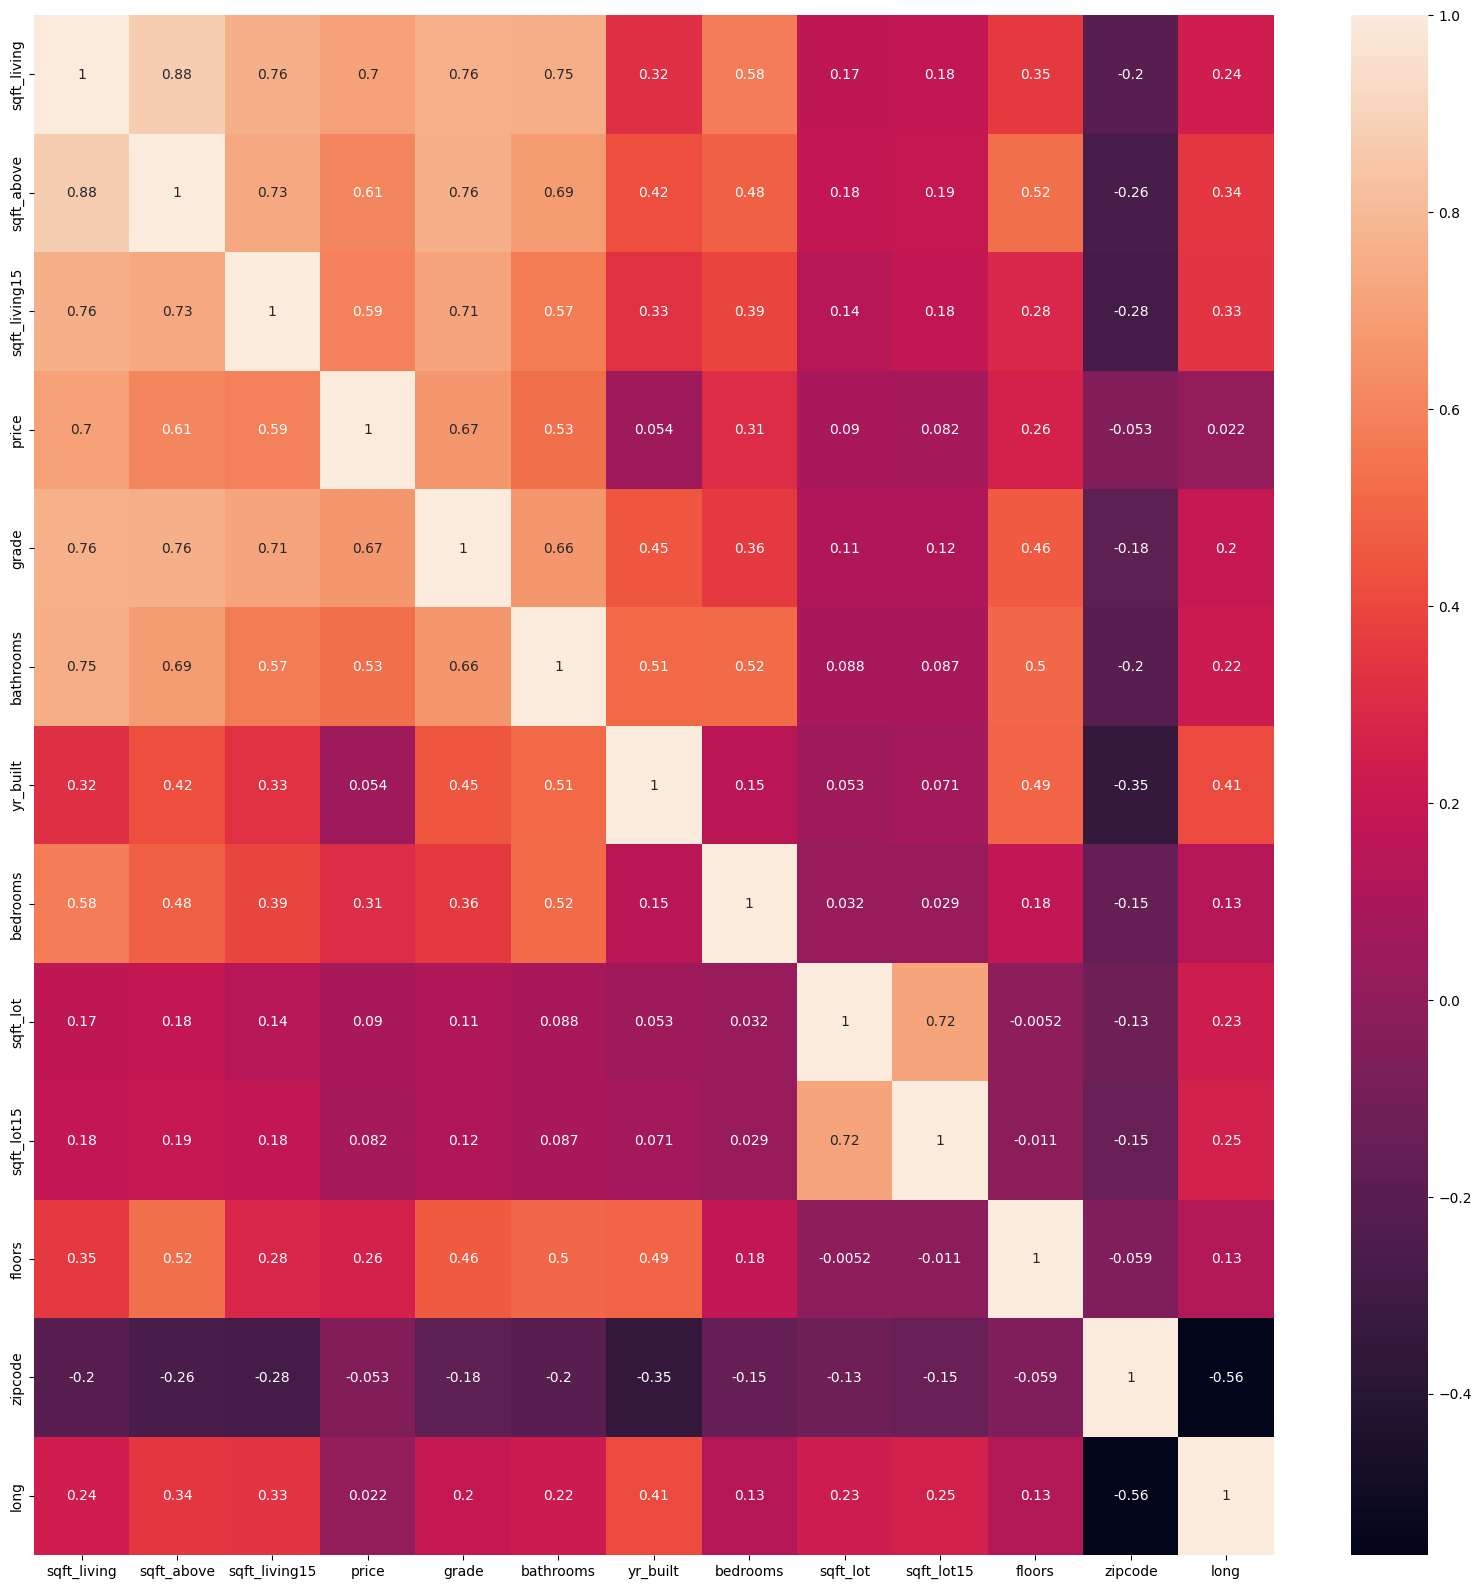

In [8]:
iterate = iterate_cov(numeric_X)
cov_var = []
for ins in iterate:
  for elem in ins:
    if elem not in cov_var:
      cov_var.append(elem)
print(cov_var)
for i in range(len(cov_var)):
  cov_var[i] = str(cov_var[i])

correlation_matrix = numeric_X[[x for x in cov_var]].corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

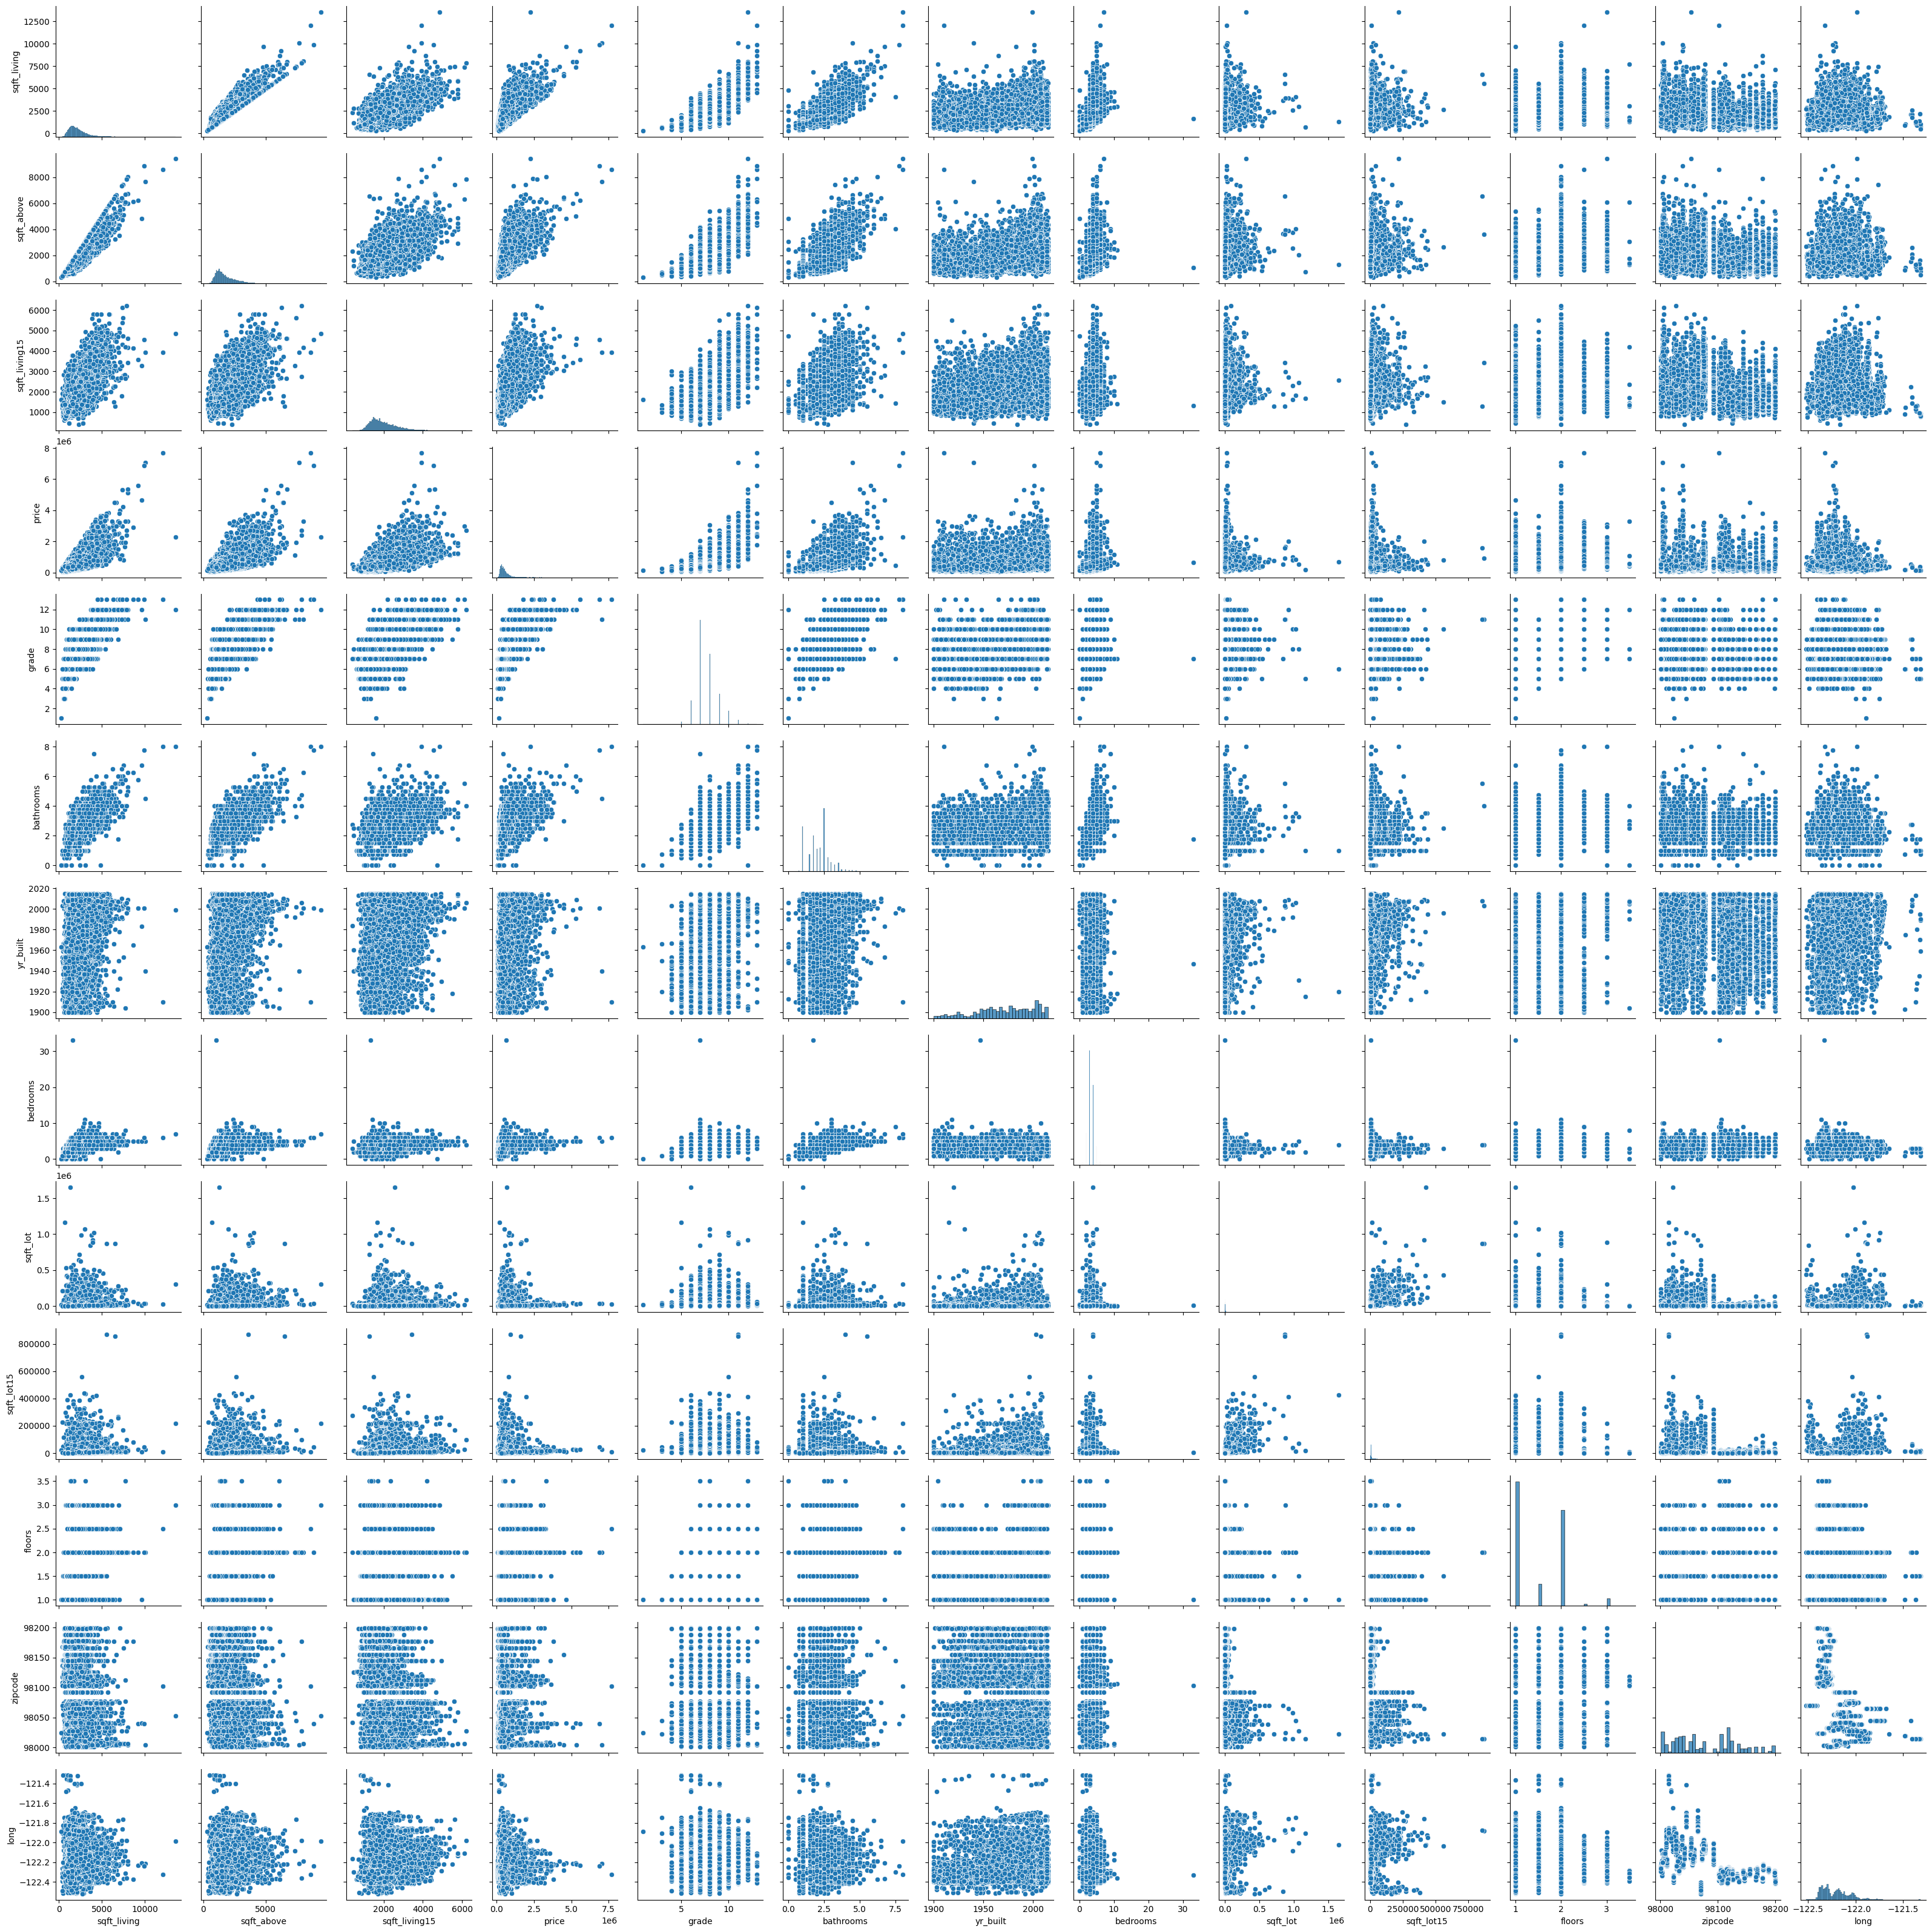

In [9]:
sns.pairplot(numeric_X[[x for x in cov_var]])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
def norm(X):
    X_norm = (X - X.mean()) / X.std()
    X_norm = X_norm.fillna(0)  # se qualche std è 0, evita NaN
    return X_norm


new_X=numeric_X.drop("id", axis=1)
new_X=norm(new_X)
theta = np.zeros(new_X.shape[1]+1)
bias = np.ones(new_X.shape[0])
new_X = np.column_stack((bias, new_X))
print(new_X.shape)
print(theta.shape)

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, random_state = 0)

(21613, 18)
(18,)


In [11]:
#funzione di ipotesi
def hypotesis_function(theta, X):
  return X @ theta
print(hypotesis_function(theta, new_X))

#funzione di costo
def cost_function(theta, X, y):
  m = len(y)
  error = (hypotesis_function(theta, X) - y)**2
  return (1/(2*m))*np.sum(error)

print(cost_function(theta, new_X, y))

def gradient_descent(theta, X, y, step=1000, learning_rate=0.01):
    m = len(y)
    gradients = []

    for i in range(step):
        error = hypotesis_function(theta, X) - y
        gradient = (1/m) * (X.T @ error)
        theta -= learning_rate * gradient

        grad_norm = np.linalg.norm(gradient)
        gradients.append(grad_norm)

        if i % 100 == 0:
            cost = cost_function(theta, X, y)
            print(f"Step {i}: Cost = {cost:.6f}, Gradient norm = {grad_norm:.6e}")
            plt.plot(range(len(gradients)), gradients)
            plt.xlabel("Step")
            plt.ylabel("Norma del gradiente")
            plt.title("Convergenza della discesa del gradiente")
            plt.show()

        # Criterio di arresto se il gradiente è quasi nullo
        if grad_norm < 1e-8:
            print(f"Convergenza raggiunta allo step {i}")
            break

    # Plot della discesa del gradiente


    return theta

[0. 0. 0. ... 0. 0. 0.]
213235671551.19766


Step 0: Cost = 208884727084.576233, Gradient norm = 8.900782e+05


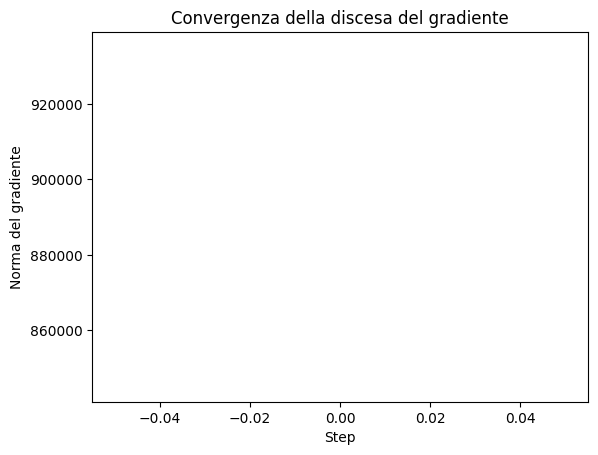

Step 100: Cost = 27376681435.249825, Gradient norm = 2.136591e+05


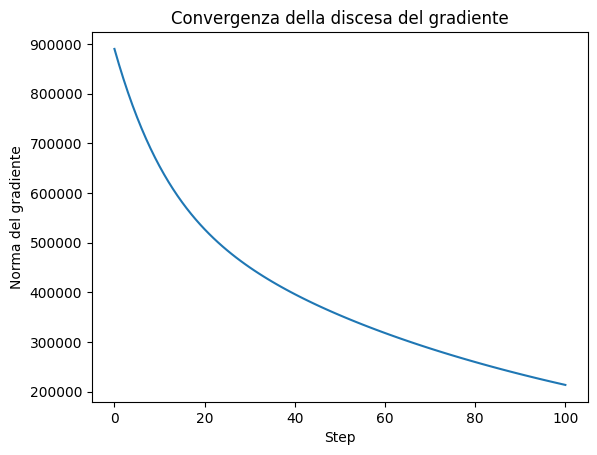

Step 200: Cost = 6829044970.526897, Gradient norm = 8.788435e+04


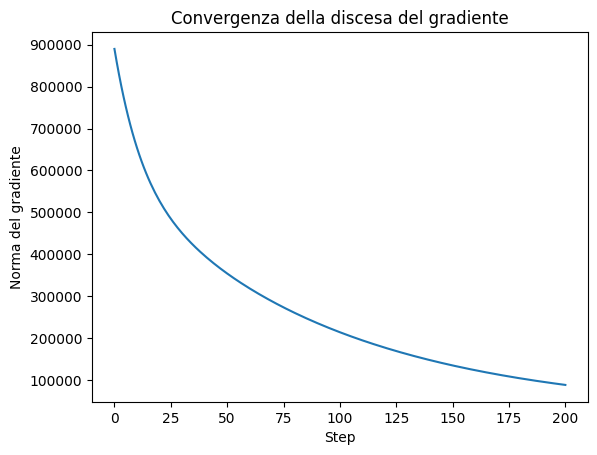

Step 300: Cost = 2816624164.135541, Gradient norm = 4.456993e+04


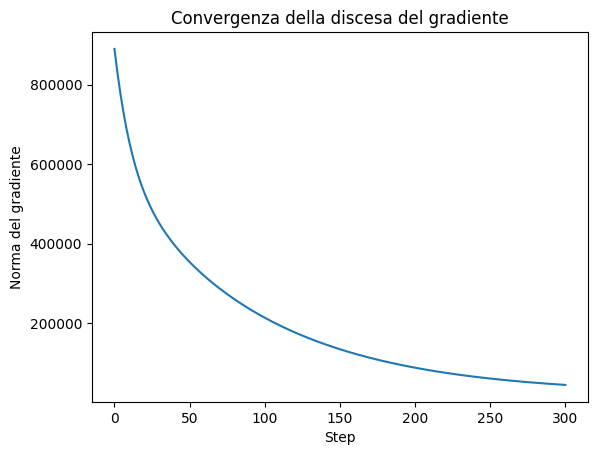

Step 400: Cost = 1546432573.002674, Gradient norm = 2.871363e+04


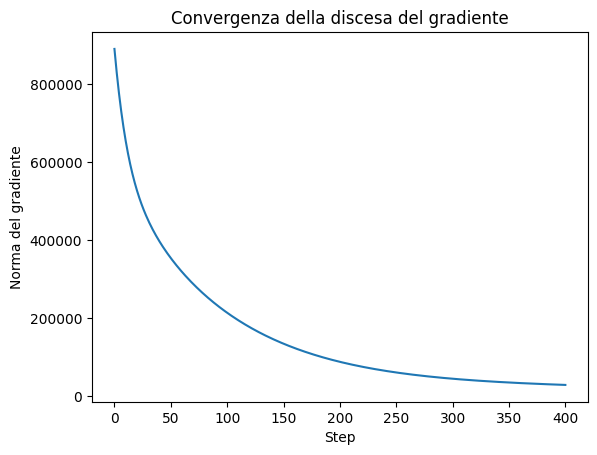

Step 500: Cost = 940074917.240525, Gradient norm = 2.116936e+04


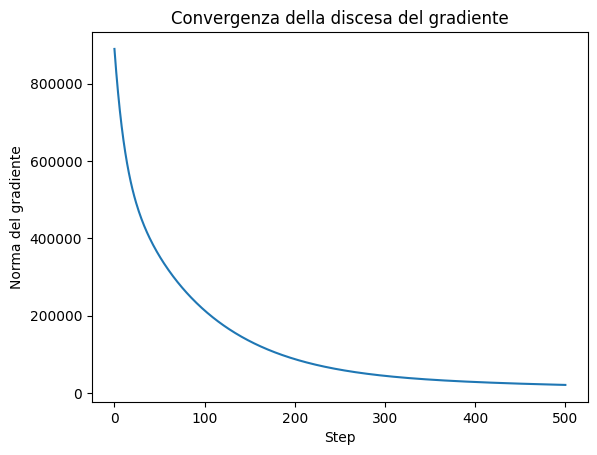

Step 600: Cost = 592055204.037973, Gradient norm = 1.640052e+04


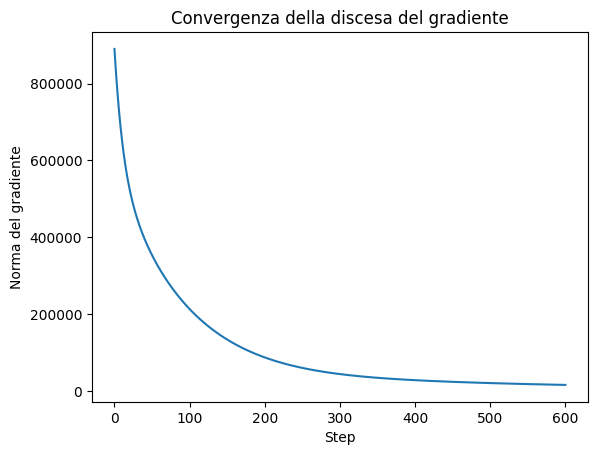

Step 700: Cost = 378985914.598615, Gradient norm = 1.294252e+04


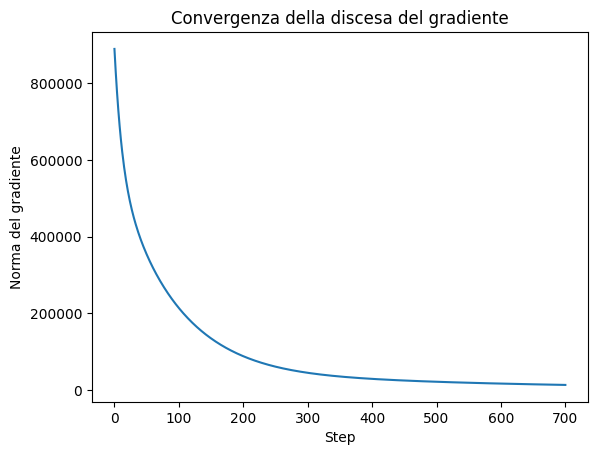

Step 800: Cost = 245047677.056724, Gradient norm = 1.030688e+04


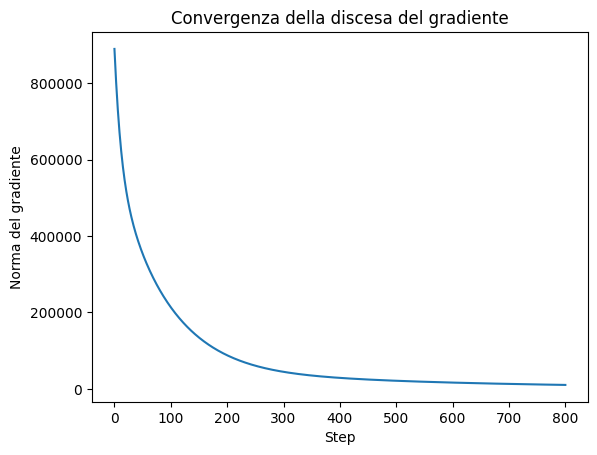

Step 900: Cost = 159609120.565867, Gradient norm = 8.256029e+03


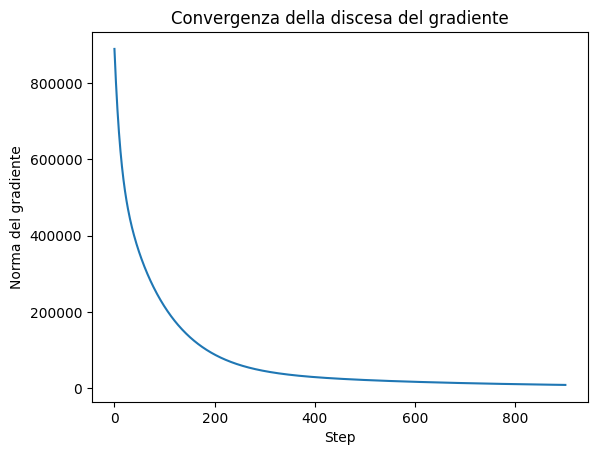

In [12]:
new_theta = gradient_descent(
    theta,
    X_train,
    y_train
)


In [13]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error, median_absolute_error
)

y_pred = hypotesis_function(new_theta, X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"MAPE: {mape:.3f}")
print(f"MedAE: {medae:.3f}")


MAE: 9692.827
RMSE: 13541.291
R²: 0.998
MAPE: 0.022
MedAE: 7406.672
